In [1]:
#importing libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

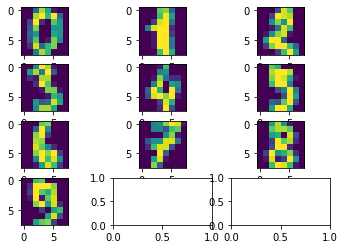

In [20]:
digits = load_digits()

f, axarr = plt.subplots(4,3)
axarr[0,0].imshow(digits.images[0])
axarr[0,1].imshow(digits.images[1])
axarr[0,2].imshow(digits.images[2])
axarr[1,0].imshow(digits.images[3])
axarr[1,1].imshow(digits.images[4])
axarr[1,2].imshow(digits.images[5])
axarr[2,0].imshow(digits.images[6])
axarr[2,1].imshow(digits.images[7])
axarr[2,2].imshow(digits.images[8])
axarr[3,0].imshow(digits.images[9])

In [21]:
class LogisticRegression():
    """Class for training and using a model for logistic regression"""
    
    def set_values(self, initial_params, alpha=0.01, iter_max=5000, class_interest=0):
        """Set the values for initial params, step size, maximum iteration, and class of interest"""
        
        self.params = initial_params
        self.alpha = alpha
        self.iter_max = iter_max
        self.class_interest = class_interest
    
    @staticmethod
    def _sigmoid(a):
        """Sigmoide function"""
        
        return 1.0 / (1.0 + np.exp(-a))
    
    def predict(self, bar_a, params):
        """predict the probability of a class"""  
                
        return self._sigmoid(np.dot(params, bar_a))
    
    def _compute_cost(self, input_var, output_var, params):
        """Compute the log likelihood cost"""
        
        cost = 0
        for x, y in zip(input_var, output_var):
            bar_a = np.array(np.insert(x, 0, 1))
            y_hat = self.predict(bar_a, params)
            
            y_binary = 1.0 if y == self.class_interest else 0.0
            cost += y_binary * np.log(y_hat) + (1.0 - y_binary) * np.log(1 - y_hat)
            
        return cost
    
    def train(self, input_var, label, iter_print = 5000):
        """Train the model """
        
        iteration = 1
        while iteration < self.iter_max:
            if iteration % iter_print == 0:
                print(f'iteration: {iteration}')
                print(f'cost: {self._compute_cost(input_var, label, self.params)}')
                print('--------------------------------------------')
            
            for i, xy in enumerate(zip(input_var, label)):
                bar_a = np.array(np.insert(xy[0], 0, 1))
                y_hat = self.predict(bar_a, self.params)
                
                y_binary = 1.0 if xy[1] == self.class_interest else 0.0
                gradient = (y_binary - y_hat) * bar_a
                self.params += self.alpha * gradient
            
            iteration +=1
        
        return self.params

    def test(self, input_test, test_label):
        """Test the accuracy of the model """
        
        self.total_classifications = 0
        self.correct_classifications = 0
        
        for x,y in zip(input_test, test_label):
            self.total_classifications += 1
            bar_a = np.array(np.insert(x, 0, 1))
            y_hat = self.predict(bar_a, self.params)
            y_binary = 1.0 if y == self.class_interest else 0.0
            
            if y_hat >= 0.5 and  y_binary == 1:
                # correct classification of class_of_interest
                self.correct_classifications += 1
              
            if y_hat < 0.5 and  y_binary != 1:
                # correct classification of an other class
                self.correct_classifications += 1
                
        self.accuracy = self.correct_classifications / self.total_classifications
            
        return self.accuracy

In [22]:
# split the data to training and test sets
train_digits, test_digits, digits_label_train, digits_label_test =\
train_test_split(digits.data, digits.target, test_size=0.20)

In [13]:
# train a classifier for the ZERO digit
alpha = 1e-2
params_0 = np.zeros(len(digits.data[0]) + 1)

iter_max = 10000
digits_regression_model_0 = LogisticRegression()
digits_regression_model_0.set_values(params_0, alpha, iter_max, 0)

params =\
digits_regression_model_0.train(train_digits / 16.0, digits_label_train, 1000)

iteration: 1000
cost: -1.8617723833598285
--------------------------------------------
iteration: 2000
cost: -1.04813941096907
--------------------------------------------
iteration: 3000
cost: -0.7367924255634913
--------------------------------------------
iteration: 4000
cost: -0.5702400317991684
--------------------------------------------
iteration: 5000
cost: -0.46601609233456326
--------------------------------------------
iteration: 6000
cost: -0.39446312793281285
--------------------------------------------
iteration: 7000
cost: -0.34221929379689436
--------------------------------------------
iteration: 8000
cost: -0.3023567591354298
--------------------------------------------
iteration: 9000
cost: -0.27091771337070814
--------------------------------------------


In [15]:
#accuracy
accuracy = digits_regression_model_0.test(test_digits / 16.0, digits_label_test)
print(f'Accuracy of prediciting a ONE digit in test set: {accuracy}')

Accuracy of prediciting a ONE digit in test set: 1.0


In [16]:
# train a classifier for the ONE digit
alpha = 1e-2
params_0 = np.zeros(len(digits.data[0]) + 1)

iter_max = 10000
digits_regression_model_1 = LogisticRegression()
digits_regression_model_1.set_values(params_0, alpha, iter_max, 1)

params =\
digits_regression_model_1.train(train_digits / 16.0, digits_label_train, 1000)

iteration: 1000
cost: -29.880010627991478
--------------------------------------------
iteration: 2000
cost: -23.89083533706708
--------------------------------------------
iteration: 3000
cost: -20.98449971808456
--------------------------------------------
iteration: 4000
cost: -19.13182920303362
--------------------------------------------
iteration: 5000
cost: -17.794194844846004
--------------------------------------------
iteration: 6000
cost: -16.75601529792599
--------------------------------------------
iteration: 7000
cost: -15.911384332272544
--------------------------------------------
iteration: 8000
cost: -15.201148715363093
--------------------------------------------
iteration: 9000
cost: -14.589201614485031
--------------------------------------------


In [17]:
#accuracy
accuracy = digits_regression_model_1.test(test_digits / 16.0, digits_label_test)
print(f'Accuracy of prediciting a ONE digit in test set: {accuracy}')

Accuracy of prediciting a TWO digit in test set: 0.9722222222222222


In [18]:
# train a classifier for the TWO digit
alpha = 1e-2
params_0 = np.zeros(len(digits.data[0]) + 1)

iter_max = 10000
digits_regression_model_2 = LogisticRegression()
digits_regression_model_2.set_values(params_0, alpha, iter_max, 0)

params =\
digits_regression_model_2.train(train_digits / 16.0, digits_label_train, 1000)

iteration: 1000
cost: -1.8617723833598285
--------------------------------------------
iteration: 2000
cost: -1.04813941096907
--------------------------------------------
iteration: 3000
cost: -0.7367924255634913
--------------------------------------------
iteration: 4000
cost: -0.5702400317991684
--------------------------------------------
iteration: 5000
cost: -0.46601609233456326
--------------------------------------------
iteration: 6000
cost: -0.39446312793281285
--------------------------------------------
iteration: 7000
cost: -0.34221929379689436
--------------------------------------------
iteration: 8000
cost: -0.3023567591354298
--------------------------------------------
iteration: 9000
cost: -0.27091771337070814
--------------------------------------------


In [19]:
#accuracy
accuracy = digits_regression_model_2.test(test_digits / 16.0, digits_label_test)
print(f'Accuracy of prediciting a TWO digit in test set: {accuracy}')

Accuracy of prediciting a TWO digit in test set: 1.0


In [23]:
# train a classifier for the Seven digit
alpha = 1e-2
params_0 = np.zeros(len(digits.data[0]) + 1)

iter_max = 10000
digits_regression_model_7 = LogisticRegression()
digits_regression_model_7.set_values(params_0, alpha, iter_max, 7)

params =\
digits_regression_model_7.train(train_digits / 16.0, digits_label_train, 1000)

iteration: 1000
cost: -4.618298287392253
--------------------------------------------
iteration: 2000
cost: -2.6344706618056746
--------------------------------------------
iteration: 3000
cost: -1.8601914108714526
--------------------------------------------
iteration: 4000
cost: -1.4429886205888383
--------------------------------------------
iteration: 5000
cost: -1.1809426351496592
--------------------------------------------
iteration: 6000
cost: -1.0006285680316993
--------------------------------------------
iteration: 7000
cost: -0.868766416732642
--------------------------------------------
iteration: 8000
cost: -0.7680366369924487
--------------------------------------------
iteration: 9000
cost: -0.6885195187394286
--------------------------------------------


In [24]:
#accuracy
accuracy = digits_regression_model_7.test(test_digits / 16.0, digits_label_test)
print(f'Accuracy of prediciting a Seven digit in test set: {accuracy}')

Accuracy of prediciting a Seven digit in test set: 0.9888888888888889


In [25]:
# train a classifier for the Nine digit
alpha = 1e-2
params_0 = np.zeros(len(digits.data[0]) + 1)

iter_max = 11000
digits_regression_model_9 = LogisticRegression()
digits_regression_model_9.set_values(params_0, alpha, iter_max, 9)

params =\
digits_regression_model_9.train(train_digits / 16.0, digits_label_train, 1000)

iteration: 1000
cost: -32.746521355146996
--------------------------------------------
iteration: 2000
cost: -28.064528588325384
--------------------------------------------
iteration: 3000
cost: -25.658505602279135
--------------------------------------------
iteration: 4000
cost: -24.085544443356067
--------------------------------------------
iteration: 5000
cost: -22.93840626335799
--------------------------------------------
iteration: 6000
cost: -22.044948510192242
--------------------------------------------
iteration: 7000
cost: -21.317101611972184
--------------------------------------------
iteration: 8000
cost: -20.70444111789916
--------------------------------------------
iteration: 9000
cost: -20.175789729721423
--------------------------------------------
iteration: 10000
cost: -19.71072662335057
--------------------------------------------


In [26]:
#accuracy
accuracy = digits_regression_model_9.test(test_digits / 16.0, digits_label_test)
print(f'Accuracy of prediciting a NINE digit in test set: {accuracy}')

Accuracy of prediciting a NINE digit in test set: 0.9694444444444444
